Pegasus Project



In [2]:
!pip install transformers
!pip install pyspellchecker
!pip install sentencepiece

     |████████████████████████████████| 1.8MB 5.8MB/s 
     |████████████████████████████████| 3.2MB 48.5MB/s 
     |████████████████████████████████| 890kB 34.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=47a514dbceab8fbe0147fe29261517a3066630f85fbe0f52f893cf33c6fd7916
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 2.5MB 5.9MB/s 
     |████████████████████████████████| 1.2MB 5.2MB/s 


In [16]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

### Examples

In [17]:
## The last two examples are from the Pegasus paper: https://arxiv.org/pdf/1912.08777.pdf
src_text = [
    """ PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. 
    The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow.""",
    """She will play Denker, a lady’s maid to Dame Maggie Smith’s character, the Dowager Countess of Grantham. Johnston, who has also appeared in
Waking the Dead and Coronation Street, joins new stars Richard E Grant and Anna Chancellor, both of whom will play guests of the Granthams
at Downton. The hit period drama will return to screens this autumn. Series four of the show, which followed the wealthy Grantham family and
their servants, achieved an average of 11.9 million viewers in the UK. The very British drama has also been a huge hit in the US, winning both
Emmy Awards and Golden Globes. More than 26 million viewers watched series four on Masterpiece on PBS, making it one of the highest rating
shows on American television. Previous high profile guest stars include Shirley Maclaine who played Martha Levinson, Lady Grantham’s mother,
and Oscar-nominated actor Paul Giamatti who appeared in last year’s Christmas special as her ”maverick, playboy” son. Series five will also feature
24 star Rade Sherbedgia as a Russian refugee who has fled the revolution after World War 1. Earlier this year, executive producer Gareth Neame
promised it would have ”all the usual highs and lows, romance, drama and comedy”""",
    """Matthew Gillard, of Connsbrook Avenue in east Belfast, pleaded not guilty to charges including kidnapping and false imprisonment. The defendant,
25, also denied charges of common assault, assaulting a police officer and driving dangerously. The charges relate to incidents in east Belfast and
Comber on Saturday 4 April. Newtownards Magistrates Court heard that the defendant and the woman were in his car in east Belfast when he
began questioning her about who she was seeing. A detective giving evidence in court said the woman tried to get out of the Seat Toledo car but the
defendant allegedly drove off at speed, through a red light on Bloomfield Avenue. When the car stopped on the Belfast Road in Comber, the woman
escaped along a lane but was carried back to the car by the defendant, the court heard. An off-duty police sergeant saw this and went to help the
woman. When the sergeant tried to intervene, the defendant allegedly drove his car at the officer, forcing him to get out of the way. The sergeant was
able to pull the keys from the ignition through the car’s open window, but the defendant wrenched them from his grasp. He then drove to the Grand
Parade area of east Belfast where the woman was released. He is also alleged to have sent the woman a message threatening that if she went to police
about the incident he would ”ruin her life in every possible way”. The court heard that the defendant handed himself over to police on Wednesday,
despite being aware since Saturday that he was wanted by the PSNI. But during police interviews he refused to answer questions put to him. An
application for bail was made but this was refused. Mr Gillard will appear again in court on 1 May."""
]

In [18]:
model_name = 'google/pegasus-xsum'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [19]:
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

In [20]:
#batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest').to(torch_device)
batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest', return_tensors='pt').to(torch_device)

In [21]:
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)

In [ ]:
for txt in tgt_text:
    print(txt)

California's largest electricity provider has turned off power to hundreds of thousands of customers.
Former EastEnders actress Janet Johnston has been cast as a guest star in the fifth series of Downton Abbey.
A man has appeared in court charged with kidnapping and assaulting a police officer.


# Testing My TV Show Descriptions

In [46]:
from google.colab import files
uploaded = files.upload()

Saving tv_shows.csv to tv_shows (3).csv


In [47]:
import pandas as pd
import io

In [48]:
tv_df = pd.read_csv(io.BytesIO(uploaded['tv_shows.csv']))
tv_df

,Unnamed: 0,wiki_tag,title,description,img
0,0,The_Big_Bang_Theory,The Big Bang Theory,The Big Bang Theory originally centered on fiv...,https://upload.wikimedia.org/wikipedia/en/7/7b...
1,1,Friends,Friends,The Office is an American mockumentary sitcom ...,https://upload.wikimedia.org/wikipedia/commons...
2,2,Breaking_Bad,Breaking Bad,Breaking Bad was set and filmed in Albuquerque...,https://upload.wikimedia.org/wikipedia/en/6/61...
3,3,The_Office_(American_TV_series),The Office,"Friends is an American television sitcom, crea...",https://upload.wikimedia.org/wikipedia/commons...
4,4,Arrested_Development,Arrested Development,"Arrested Development follows the Bluths, a for...",https://upload.wikimedia.org/wikipedia/commons...
5,5,House_(TV_series),House,The series's main character is Dr. Gregory Hou...,https://upload.wikimedia.org/wikipedia/commons...
6,6,Freaks_and_Geeks,Freaks and Geeks,Freaks and Geeks follows gifted high schooler ...,https://upload.wikimedia.org/wikipedia/en/0/06...
7,7,24_(TV_series),24,The series stars Kiefer Sutherland as counter-...,https://upload.wikimedia.org/wikipedia/commons...
8,8,That%27s_So_Raven,That's So Raven,"Set in San Francisco, That’s So Raven stars A...",https://upload.wikimedia.org/wikipedia/commons...
9,9,Curb_Your_Enthusiasm,Curb Your Enthusiasm,Curb Your Enthusiasm was created by Larry Davi...,https://upload.wikimedia.org/wikipedia/commons...


In [71]:
test = "The sinking of the Titanic. The Irish potato famine. The McDonald's coffee lawsuit. This funny and informative podcast investigates some of the greatest failures of our time; how they happened, what went wrong, and whether they could have been prevented. History buffs who want a chuckle, this one's for you."
batch = tokenizer.prepare_seq2seq_batch(test, truncation=True, padding='longest', return_tensors='pt').to(torch_device)
translated = model.generate(**batch)
tgt_text_test = tokenizer.batch_decode(translated, skip_special_tokens=True)
tgt_text_test

['History is full of mistakes.']

In [66]:
short_summary = []
for i in range(10):
  batch = tokenizer.prepare_seq2seq_batch(tv_df['description'][i], truncation=True, padding='longest', return_tensors='pt').to(torch_device)
  translated = model.generate(**batch)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
  short_summary.append(str(tgt_text[0]))

In [67]:
tv_df['short_summary'] = short_summary

In [68]:
short_summary

['The Big Bang Theory is one of the most popular sitcoms in US television history.',
 'The Office is an American mockumentary sitcom television series that depicts the everyday work lives of office employees in the Scranton, Pennsylvania branch of the fictional Dunder Paper Company.',
 'Breaking Bad, the Emmy Award-winning drama about a high school chemistry teacher who turns to crime to make ends meet, has been renewed for a fifth season by AMC.',
 'Friends is an American television sitcom, created by David Crane and Marta Kauffman, which aired on NBC from September 22, 1994, to May 6, 2004, lasting ten seasons.',
 'The cult 1980s sitcom Arrested Development has been remastered and released on Blu-ray.',
 'House is a British drama television series broadcast on BBC One in the United States.',
 'The cult 1980s sitcom Freaks and Geeks has been renewed for a second season.',
 'The sixth and final season of the hit TV drama 24: Legacy will be broadcast on BBC One in the UK on 24 February.

In [69]:
tv_df

,Unnamed: 0,wiki_tag,title,description,img,short_summary
0,0,The_Big_Bang_Theory,The Big Bang Theory,The Big Bang Theory originally centered on fiv...,https://upload.wikimedia.org/wikipedia/en/7/7b...,The Big Bang Theory is one of the most popular...
1,1,Friends,Friends,The Office is an American mockumentary sitcom ...,https://upload.wikimedia.org/wikipedia/commons...,The Office is an American mockumentary sitcom ...
2,2,Breaking_Bad,Breaking Bad,Breaking Bad was set and filmed in Albuquerque...,https://upload.wikimedia.org/wikipedia/en/6/61...,"Breaking Bad, the Emmy Award-winning drama abo..."
3,3,The_Office_(American_TV_series),The Office,"Friends is an American television sitcom, crea...",https://upload.wikimedia.org/wikipedia/commons...,"Friends is an American television sitcom, crea..."
4,4,Arrested_Development,Arrested Development,"Arrested Development follows the Bluths, a for...",https://upload.wikimedia.org/wikipedia/commons...,The cult 1980s sitcom Arrested Development has...
5,5,House_(TV_series),House,The series's main character is Dr. Gregory Hou...,https://upload.wikimedia.org/wikipedia/commons...,House is a British drama television series bro...
6,6,Freaks_and_Geeks,Freaks and Geeks,Freaks and Geeks follows gifted high schooler ...,https://upload.wikimedia.org/wikipedia/en/0/06...,The cult 1980s sitcom Freaks and Geeks has bee...
7,7,24_(TV_series),24,The series stars Kiefer Sutherland as counter-...,https://upload.wikimedia.org/wikipedia/commons...,The sixth and final season of the hit TV drama...
8,8,That%27s_So_Raven,That's So Raven,"Set in San Francisco, That’s So Raven stars A...",https://upload.wikimedia.org/wikipedia/commons...,A new children’s TV series has been commission...
9,9,Curb_Your_Enthusiasm,Curb Your Enthusiasm,Curb Your Enthusiasm was created by Larry Davi...,https://upload.wikimedia.org/wikipedia/commons...,Curb Your Enthusiasm has been renewed for a se...


# Testing Podcasts

In [72]:
from google.colab import files
uploaded = files.upload()

Saving podcast.csv to podcast.csv


In [73]:
import pandas as pd
import io

In [74]:
podcast_df = pd.read_csv(io.BytesIO(uploaded['podcast.csv']))

In [81]:
short_summary = []
for i in range(41):
  batch = tokenizer.prepare_seq2seq_batch(podcast_df['description'][i], truncation=True, padding='longest', return_tensors='pt').to(torch_device)
  translated = model.generate(**batch)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
  short_summary.append(str(tgt_text[0]))

In [82]:
len(short_summary)

41

In [83]:
podcast_df.head()

,Unnamed: 0,name,description,img
0,0,Becoming Wise,Gain new insight on life and morality in the t...,https://hips.hearstapps.com/hmg-prod.s3.amazon...
1,1,Every Little Thing,Host Flora Lichtman explores topics ranging fr...,https://hips.hearstapps.com/hmg-prod.s3.amazon...
2,2,WE Well-Being Podcast,"Canada's first lady, Sophie Gregoire Trudeau, ...",https://hips.hearstapps.com/hmg-prod.s3.amazon...
3,3,This American Life,The first ever podcast to win a Pulitzer Prize...,https://hips.hearstapps.com/hmg-prod.s3.amazon...
4,4,Beautiful Anonymous,Offbeat comedian Chris Gethard invites anonymo...,https://hips.hearstapps.com/hmg-prod.s3.amazon...


In [84]:
podcast_df['short_summary'] = short_summary

In [91]:
podcast_df

,Unnamed: 0,name,description,img,short_summary,original_length,pegasus_length,summary_ratio
0,0,Becoming Wise,Gain new insight on life and morality in the t...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,Have you ever wondered what makes a good cup o...,218,52,0.238532
1,1,Every Little Thing,Host Flora Lichtman explores topics ranging fr...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,"On this week's episode of The Big Bang Theory,...",224,150,0.669643
2,2,WE Well-Being Podcast,"Canada's first lady, Sophie Gregoire Trudeau, ...",https://hips.hearstapps.com/hmg-prod.s3.amazon...,"On World Mental Health Day, the BBC News websi...",209,105,0.502392
3,3,This American Life,The first ever podcast to win a Pulitzer Prize...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,If you've ever wanted to know what makes a goo...,312,91,0.291667
4,4,Beautiful Anonymous,Offbeat comedian Chris Gethard invites anonymo...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,If you've ever wondered what it's like to call...,371,108,0.291105
5,5,The Michelle Obama Podcast,Tune in to listen to the former First Lady in ...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,"Michelle Obama's new talk show, The Michelle O...",247,85,0.344130
6,6,Motherhood Sessions,Even supermoms need a little advice sometimes....,https://hips.hearstapps.com/hmg-prod.s3.amazon...,It's not easy being a mother.,248,29,0.116935
7,7,Call Your Girlfriend,Hosts and long-distance besties Ann Friedman a...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,"In case you missed it, here's your chance to f...",239,108,0.451883
8,8,The Trend Reporter,Emmy Award winning TV personality and journali...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,If you want to know what's going on in the wor...,347,108,0.311239
9,9,Dolly Parton's America,Join host Jad Abumrad on a personal journey to...,https://hips.hearstapps.com/hmg-prod.s3.amazon...,Country music legend Dolly Parton is celebrati...,246,77,0.313008


In [86]:
podcast_df["original_length"] = 0
podcast_df["pegasus_length"] = 0

In [87]:
for j in range(41):
  podcast_df["original_length"][j] = len(podcast_df['description'][j])
  podcast_df["pegasus_length"][j] = len(podcast_df['short_summary'][j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
podcast_df['summary_ratio'] = podcast_df['pegasus_length'] / podcast_df['original_length']

In [96]:
# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/podcast_pegasus.csv', 'w') as f:
  podcast_df.to_csv(f)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [93]:
podcast_df.to_csv(r'podcast_pegasus.csv')

### Pipelines

In [56]:
tv_df['short_summary'] = short_summary


In [ ]:
from transformers import pipeline

In [ ]:
nlp_summary = pipeline('summarization', model=model, tokenizer=tokenizer)

In [ ]:
nlp_summary(src_text[0])

Your max_length is set to 64, but you input_length is only 55. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[{'summary_text': "California's largest electricity provider has turned off power to hundreds of thousands of customers."}]

### Wikipedia Random API

In [ ]:
from urllib.request import urlopen
import json

def get_random_text():
    with urlopen('https://en.wikipedia.org/api/rest_v1/page/random/summary') as f:
        content = f.read().decode('utf-8')
        json_dict = json.loads(content)
        return json_dict['extract']

In [ ]:
import pandas as pd

class StatsData():
    def __init__(self):
        self.inputs = []
        self.summaries = []
        self.input_length = []
        self.summary_length = []
        
    def add_text(self, input_text, summary):
        self.inputs.append(input_text)
        self.summaries.append(summary)
        self.input_length.append(len(input_text))
        self.summary_length.append(len(summary))
        
    def __repr__(self):
        return f'Stats data with total length: {len(self.inputs)}'
    
    def create_df(self):
        return pd.DataFrame({'input_text': self.inputs, 'summary': self.summaries, 'input_text_length': self.input_length, 'summary_length': self.summary_length})

In [ ]:
from tqdm.notebook import tqdm

stats_data = StatsData()
required_summaries = 10
for i in tqdm(range(required_summaries), total=required_summaries):
    text = get_random_text()
    summary = nlp_summary(text)[0]['summary_text']
    if len(text) > 120 and len(text) < 600:
        stats_data.add_text(text, summary)
    

Your max_length is set to 64, but you input_length is only 26. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 64, but you input_length is only 50. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 64, but you input_length is only 37. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 64, but you input_length is only 58. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


In [ ]:
summary_data = stats_data.create_df()

Adding a column 'summary_ratio' which is the ration of summary length to original text length

In [ ]:
summary_data['summary_ratio'] = summary_data['summary_length'] / summary_data['input_text_length']

In [ ]:
summary_data

,input_text,summary,input_text_length,summary_length,summary_ratio
0,"""Me, Myself and I"" is a song recorded by Ameri...","""Me, Myself and I"" is a song recorded by Beyon...",586,109,0.186007
1,Føresvik is the administrative centre of Bokn ...,Fresvik is the administrative centre of Bokn m...,406,85,0.209360
2,The small sword or smallsword is a light one-h...,A selection of some of the best examples of th...,366,60,0.163934
3,Acton Beauchamp is a village and civil parish ...,Acton Beauchamp is a village and civil parish ...,227,225,0.991189
4,Vascões is a civil parish in the municipality ...,The parish of Vasces is in the north-east of P...,132,54,0.409091
5,"""Beauty Is Only Skin Deep"" is a 1964 song, wri...","""Beauty Is Only Skin Deep"" is a 1964 song, wri...",275,122,0.443636
6,Sypień is a village in the administrative dist...,Sypie is a village in the administrative distr...,245,122,0.497959
7,Pintsch is a village in the commune of Kiischp...,Pintsch is a village in the commune of Kiischp...,321,74,0.230530


In [ ]:
summary_data['input_text'][7]

'Pintsch is a village in the commune of Kiischpelt, in northern Luxembourg. As of 2006, the village has a population of 162. It was the site of intense fighting between German and American troops in the January 1945, and one of the last sites of conflict of the Battle of the Bulge, being reduced to ruins by the fighting.'

In [ ]:
summary_data['summary'][7]

'Pintsch is a village in the commune of Kiischpelt, in northern Luxembourg.'

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Input Distribution / Summary Length Distribution')

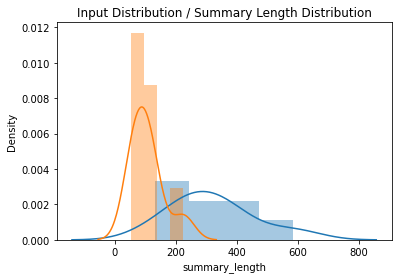

In [ ]:
import seaborn as sb

sb.distplot(summary_data['input_text_length'])
sb.distplot(summary_data['summary_length']).set_title('Input Distribution / Summary Length Distribution')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Summary Ratio Distribution')

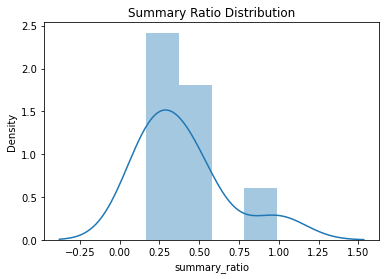

In [ ]:
sb.distplot(summary_data['summary_ratio']).set_title('Summary Ratio Distribution')

In [ ]:
f"Mean summary ratio: {summary_data['summary_ratio'].mean()}"

'Mean summary ratio: 0.39146329210106234'

### Spellchecking

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
import itertools
import collections

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_punctuation(txt):
    """Replace URLs and other punctuation found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with URLs and punctuation removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
def clean_text(txt):
    """Removes punctuation, changes to lowercase, removes
        stopwords and calculates word frequencies.

    Parameters
    ----------
    txt : string
        A text string that you want to clean.

    Returns
    -------
    Words and frequencies
    """
    
    tmp = [remove_punctuation(t) for t in txt]
    tmp = [t.lower().split() for t in tmp]
    
    tmp = [[w for w in t if not w in stop_words]
              for t in tmp]
    
    tmp = list(itertools.chain(*tmp))
    tmp = collections.Counter(tmp)
        
    return list(tmp.keys())

In [ ]:
summary_spell_check_words = clean_text(set(list(summary_data['summary'])))
input_text_check_words = clean_text(set(list(summary_data['input_text'])))

In [ ]:
from spellchecker import SpellChecker

In [ ]:
spell = SpellChecker()

# find those words that may be misspelled
summary_misspelled = spell.unknown(summary_spell_check_words)
original_misspelled = spell.unknown(input_text_check_words)
len(summary_misspelled), len(original_misspelled)

(18, 37)

In [ ]:
f"Summary mispelled ratio: {len(summary_misspelled) / len(summary_spell_check_words)}"

'Summary mispelled ratio: 0.2535211267605634'

In [ ]:
f"Original misspelled ratio: {len(original_misspelled) / len(input_text_check_words)}"

'Original misspelled ratio: 0.19072164948453607'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


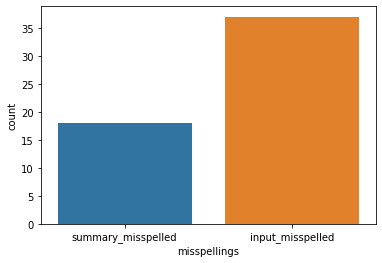

In [ ]:
misspelling_df = pd.DataFrame({'misspellings' : ["summary_misspelled" for _ in range(len(summary_misspelled))] + ["input_misspelled" for _ in range(len(original_misspelled))]})

sb.countplot(misspelling_df['misspellings'])

### Generate HTML for Visual Proofreading

In [ ]:
table_data = ""
for i, d in summary_data.iterrows():
    table_data += f"<tr><td>{d['input_text']}</td><td>{d['summary']}</td></tr>"

In [ ]:
simple_visual_check = f"""
<html>
<body>
<table>
    <tr><th>Original</th><th>Input Text</th></tr>
    {table_data}
</table>
</body>
</html>
"""

In [ ]:
with open('visual_check.html', 'w') as f:
    f.write(simple_visual_check)